This notebook is based on the adult dataset.

Task 1 and 2:

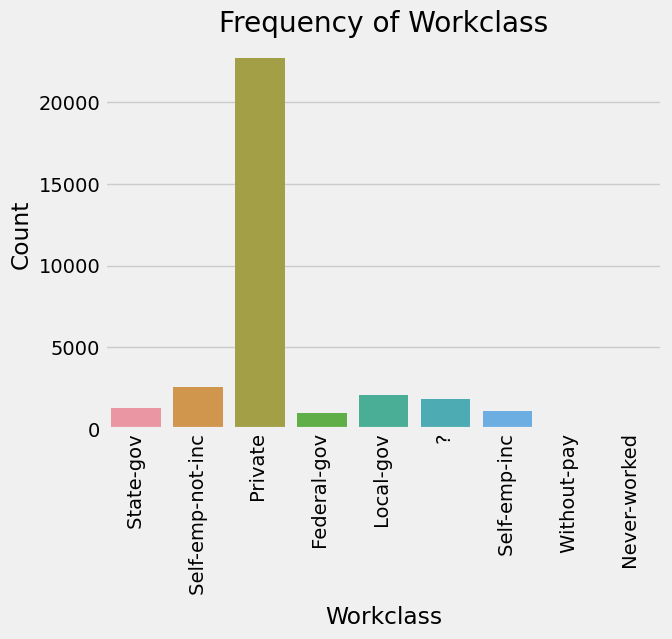

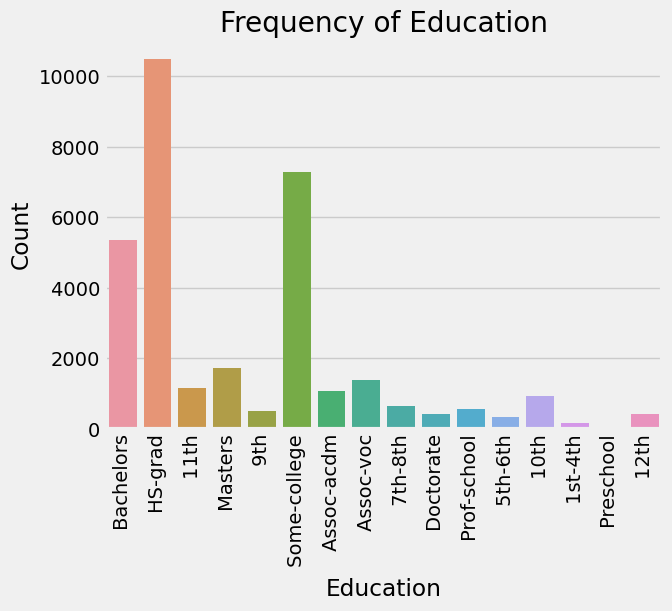

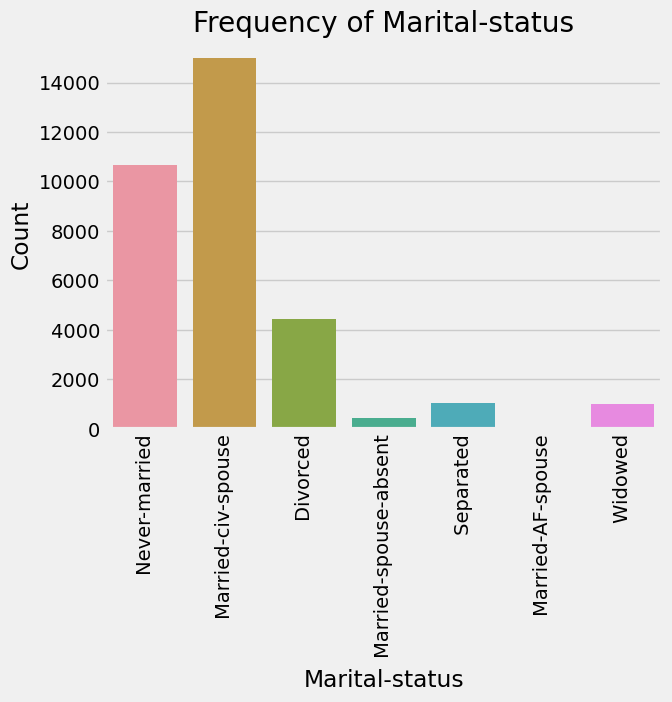

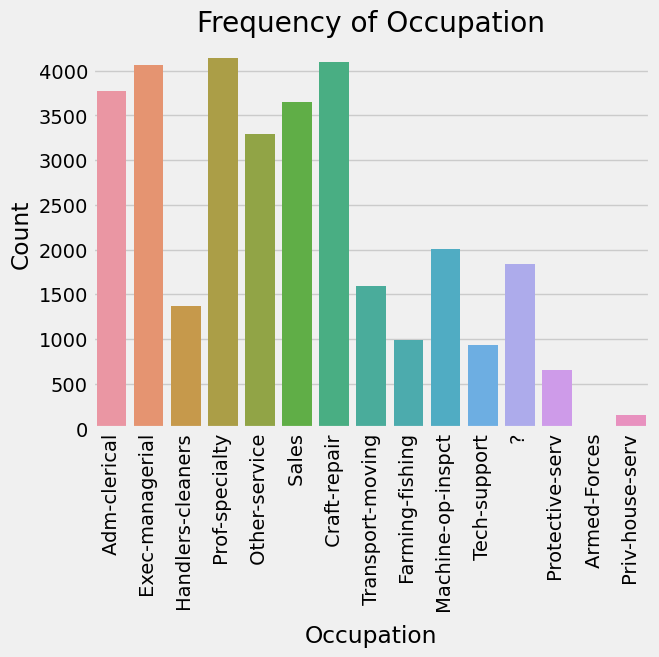

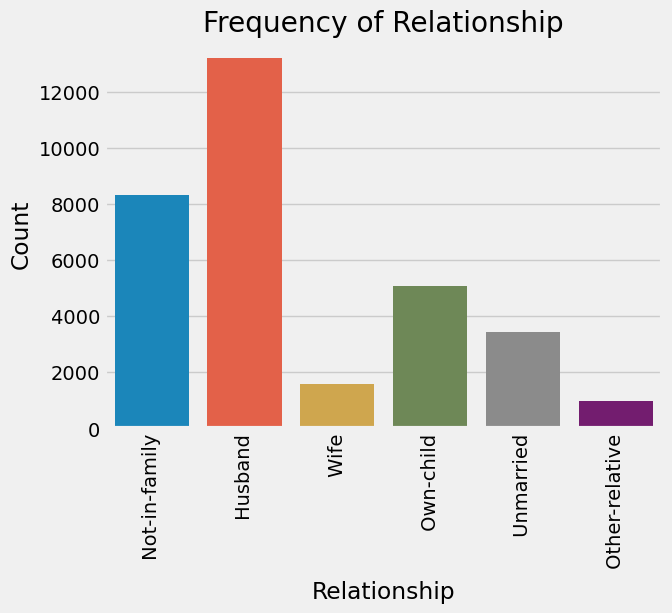

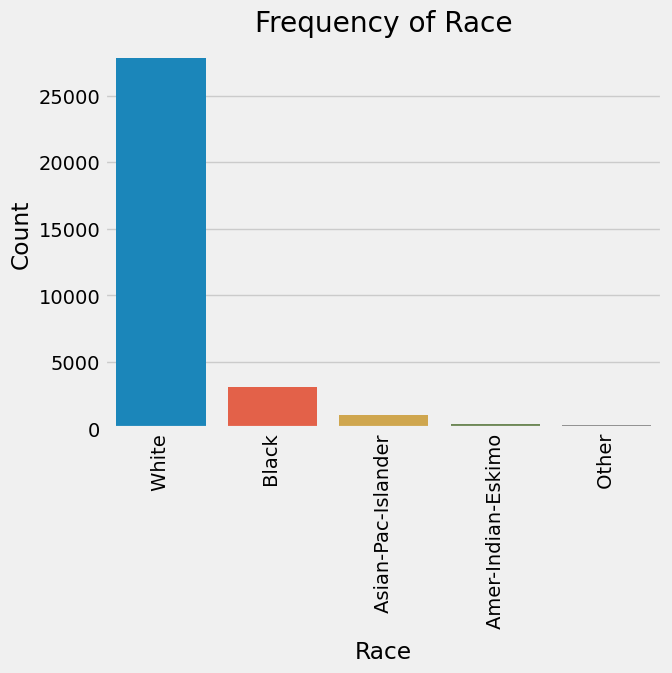

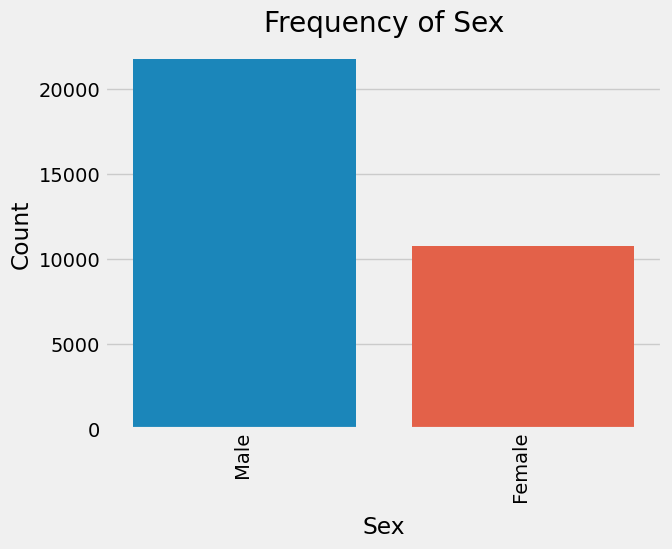

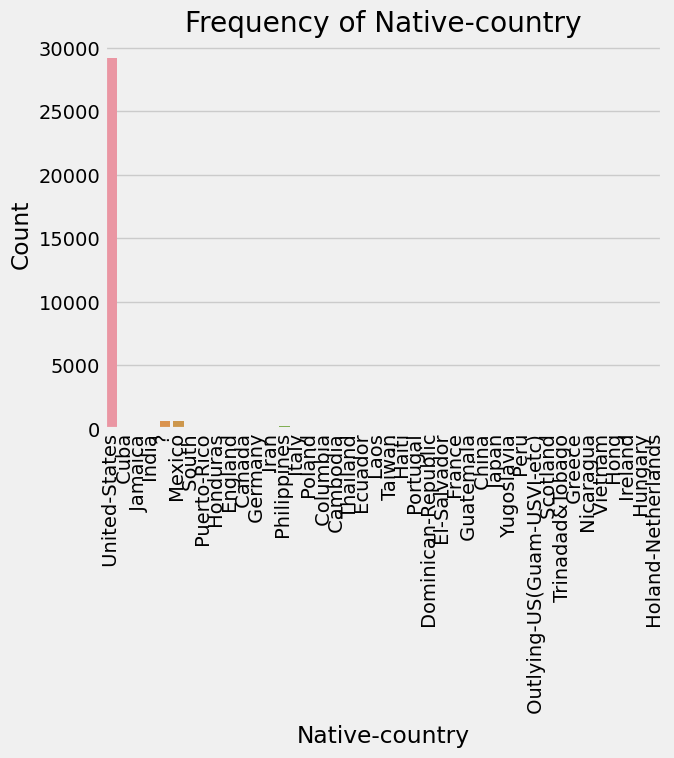

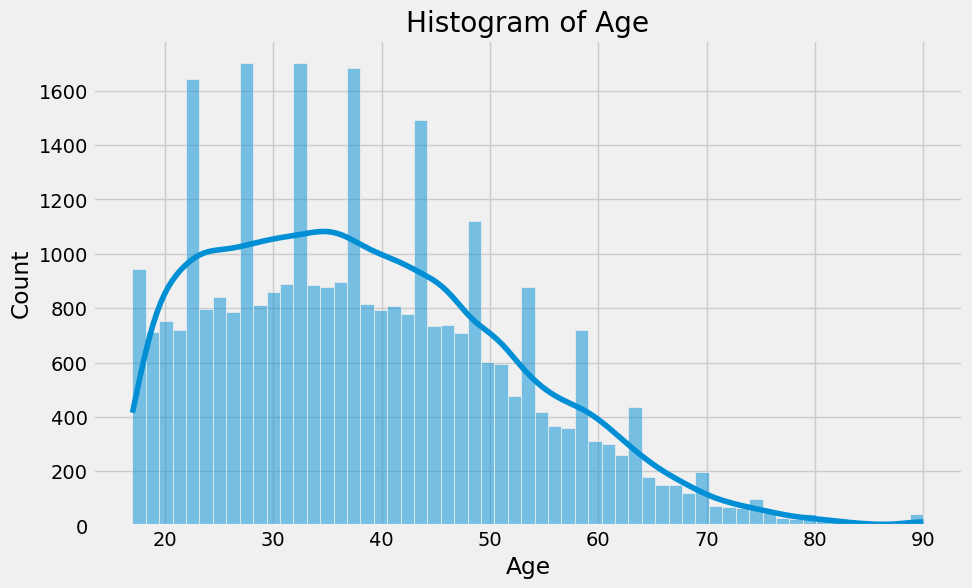

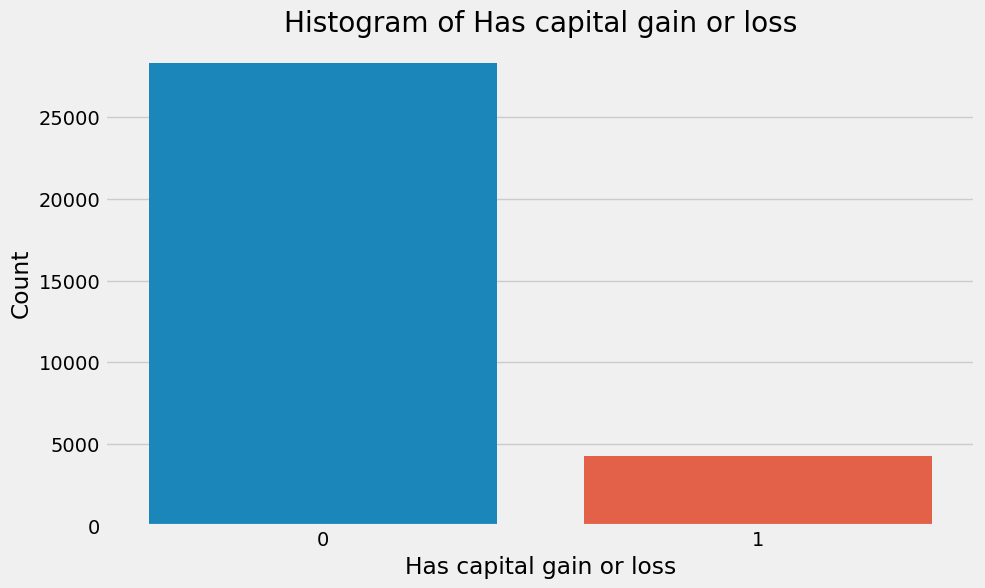

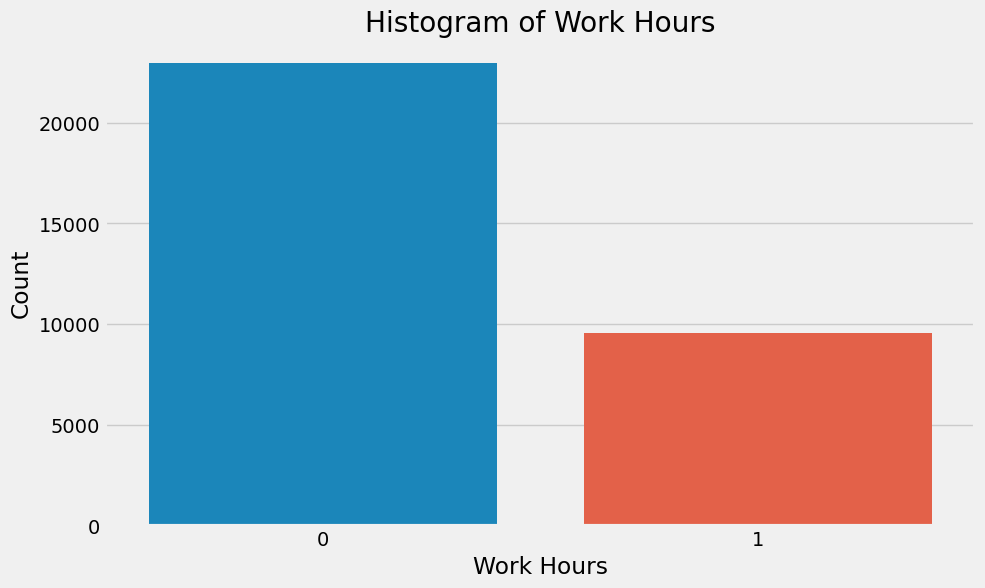

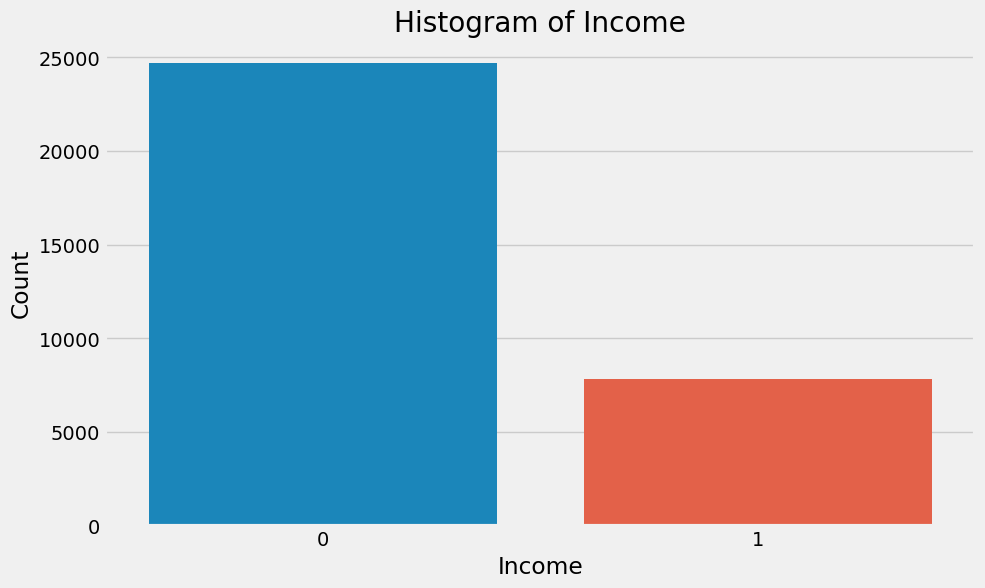

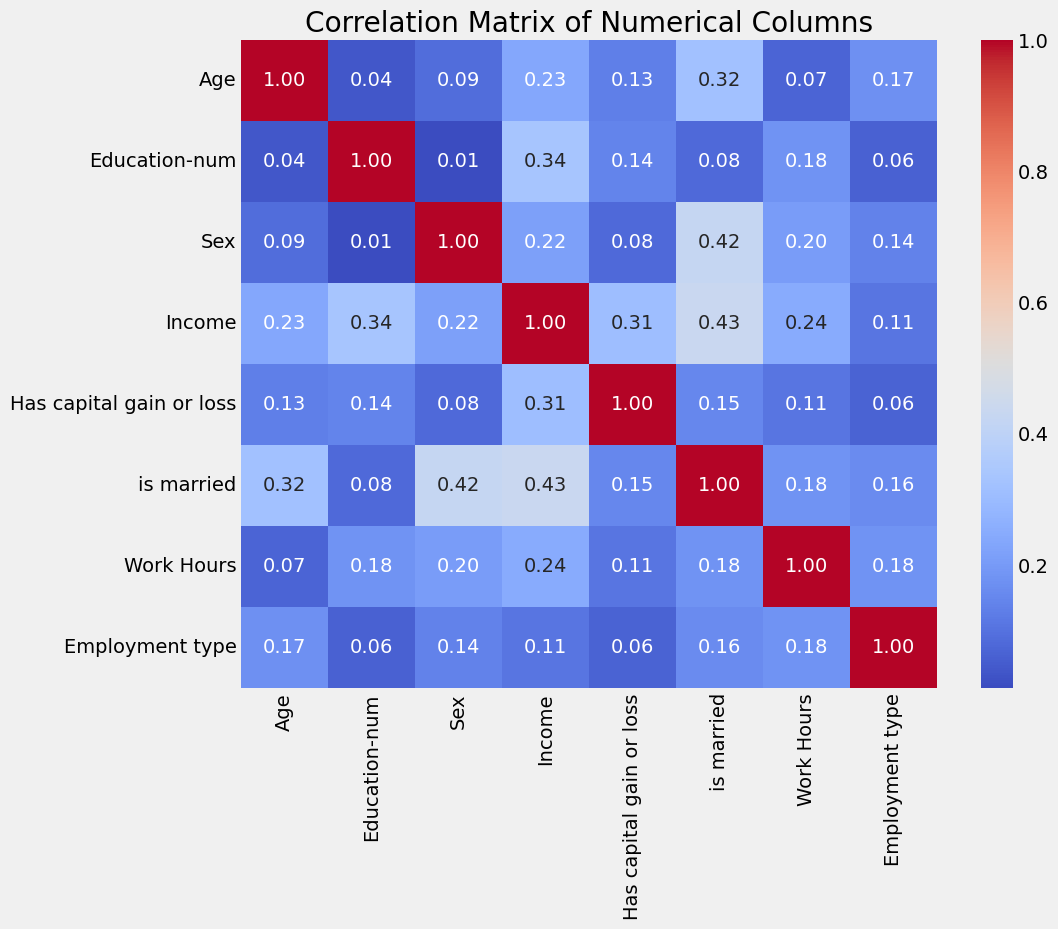

In [14]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# Define the column names
column_names = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num', 'Marital-status',
                'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss',
                'Hours-per-week', 'Native-country', 'Income']

# Read the data from the CSV file
data = pd.read_csv('./adult/adult.data', names=column_names)

# Replace '?' with NaN (missing value indicator in pandas)
data = data.replace('?', np.nan)

# Get the numerical columns from column_names
numeric_columns = [column for column in column_names if column in data.select_dtypes(include=['int64', 'float64']).columns]

# For simplicity, fill missing values with the mode value of each column
for column in data.columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

#print(data.head())

# List of categorical features to plot
categorical_features = ['Workclass', 'Education', 'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native-country']

# Plotting histograms for each categorical feature
for feature in categorical_features:
    plt.figure()
    sns.countplot(data=data, x=feature)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(f"Frequency of {feature}")
    plt.xticks(rotation=90)  # Rotates x-axis labels for better readability if needed
    plt.show()
    
# Drop the 'Fnlwgt' column
data = data.drop(columns='Fnlwgt')
column_names.remove("Fnlwgt")

# Convert the 'Capital-gain' and 'Capital-loss' columns to a binary 'Has capital gain or loss' column
data['Has capital gain or loss'] = data.apply(lambda row: 1 if row['Capital-gain'] > 0 or row['Capital-loss'] > 0 else 0, axis=1)
column_names.append('Has capital gain or loss')

data['is married'] = data['Marital-status'].apply(lambda x: 1 if x == ' Married-civ-spouse' else 1 if x == ' Married-spouse-absent' else 1 if x == ' Married-AF-spouse' else 0)
column_names.append('is married')

data = data.drop(columns='Native-country')
column_names.remove('Native-country')

data['Work Hours'] = data['Hours-per-week'].apply(lambda x: 0 if x <= 20 else 0 if x <= 40 else 2)
column_names.append('Work Hours')

data = data.drop(columns= 'Hours-per-week')
column_names.remove('Hours-per-week')

data['Employment type']= data['Workclass'].apply(lambda x: 2 if x == ' Self-emp-inc' else 2 if x == ' Self-emp-not-inc' else 0 if x == ' Never-worked' else 0 if x == ' Without-pay' else 1)
column_names.append('Employment type')
# Drop the 'Capital-gain' and 'Capital-loss' columns
data = data.drop(columns=['Capital-gain', 'Capital-loss', 'Workclass', 'Education', 'Marital-status', 'Relationship'])
column_names.remove('Capital-gain')
column_names.remove('Capital-loss')
column_names.remove('Workclass')
column_names.remove('Education')
column_names.remove('Marital-status')
column_names.remove('Relationship')




#print(data['Sex'].unique())
data['Sex']= data['Sex'].apply(lambda x: 0 if x == ' Female' else 1)
column_names.append('Sex')
#data = data.drop(columns=[ 'Sex'])



data['Income'] = data['Income'].apply(lambda x: 0 if x == ' <=50K' else 1)
# Now the 'Capital-gain' and 'Capital-loss' columns are converted to a binary 'Has capital gain or loss' column
numeric_columns = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()


data['Occupation'] = data['Occupation'].astype('category')
ohe = OneHotEncoder(sparse_output=False)
ohe_race = OneHotEncoder(sparse_output=False)
transformedRACE = ohe_race.fit_transform(data[['Race']])
transformedOCC = ohe.fit_transform(data[['Occupation']])
#print(ohe.categories_)
#print(transformed[0].size)

# List of numerical features to plot
numerical_features = ['Age', 'Has capital gain or loss', 'Work Hours', 'Income']

# Plotting boxplots for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(10, 6))  # Adjust the figsize as needed to increase the size of the plot

    # Histogram
    if feature == 'Age':
        sns.histplot(data=data, x=feature, kde=True)
    else:
        sns.countplot(data=data, x=feature)

    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Histogram of {feature}')

    if feature != 'Age':
        plt.xticks([0, 1], ['0', '1'])  

    plt.show()

for index, cat in enumerate(ohe.categories_):
    data[cat] = transformedOCC[index]

for index, cat in enumerate(ohe_race.categories_):
    data[cat] = transformedRACE[index]

data = data.drop(columns=['Occupation'])
data = data.drop(columns=['Race'])


#print(data['Occupation'])
# Print the correlation matrix
#print(correlation_matrix)

# Draw a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

The plotted features reveal some imbalances. To name some: a far higher number of private workers than any other workclass, far more white people than any other race, as well as the USA being by far the native country to most people. 

The correlation matrix shows the strongest correlation between the following features:
Being married and Income: 0.43
Being marries and Sex: 0.42
Income and Education: 0.34

For the next steps, the following changes have been made to the dataset:
- Removing 'Fnlwgt' 
- Transforming 'Capital-gain' and 'Capital-loss' into the binary 'Has capital gain or loss' 
- Transforming  'Marital-status' into the binary  'is married'
- Removing 'Native-Country'
- Transforming 'Hours-per-week' into 'Work Hours'
- Transforming 'Workclass' into the numercial feature 'Employment type' 
- Transforming 'Sex' into a binary 
- Transforming 'Income' into a binary

#text why stuff got removed/changed

Task 3:


   Age  Education-num  Sex  Income  Has capital gain or loss  is married  \
0   39             13    1       0                         1           0   
1   50             13    1       0                         0           1   
2   38              9    1       0                         0           0   
3   53              7    1       0                         0           1   
4   28             13    0       0                         0           1   

   Work Hours  Employment type    ?   Adm-clerical  ...   Prof-specialty  \
0           0                1  0.0            1.0  ...              0.0   
1           0                2  0.0            1.0  ...              0.0   
2           0                1  0.0            1.0  ...              0.0   
3           0                1  0.0            1.0  ...              0.0   
4           0                1  0.0            1.0  ...              0.0   

    Protective-serv   Sales   Tech-support   Transport-moving  \
0               0.0  

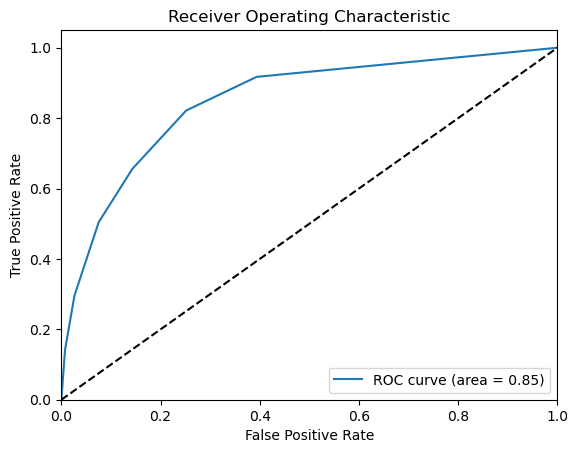

Confusion Matrix:
 [[2271  201]
 [ 426  358]]


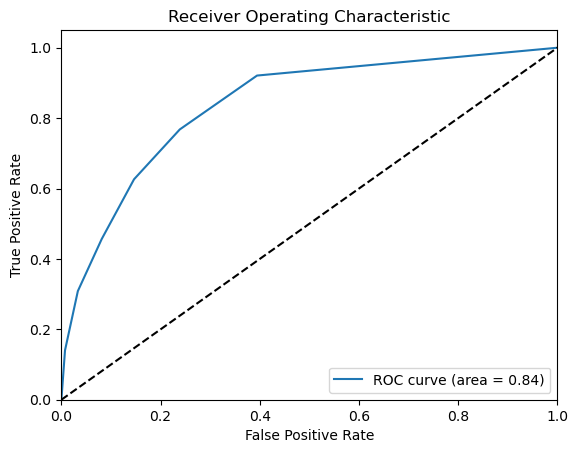

Confusion Matrix:
 [[2298  174]
 [ 410  374]]


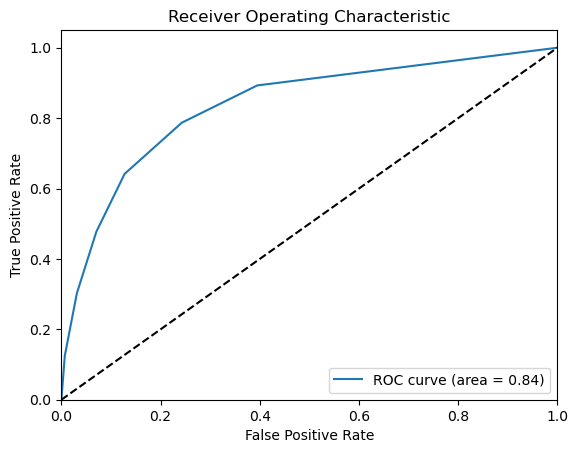

Confusion Matrix:
 [[2279  193]
 [ 428  356]]


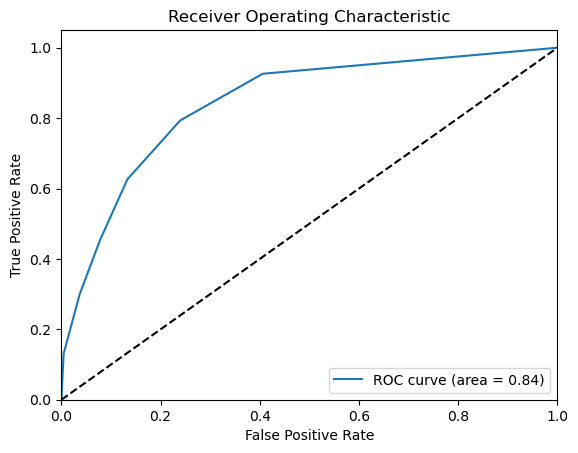

Confusion Matrix:
 [[2289  183]
 [ 432  352]]


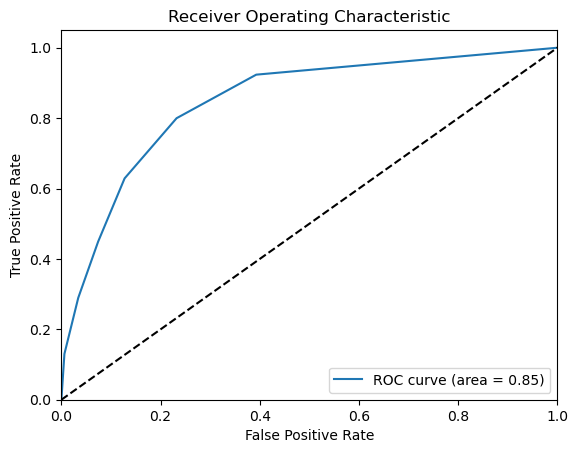

Confusion Matrix:
 [[2304  168]
 [ 390  394]]


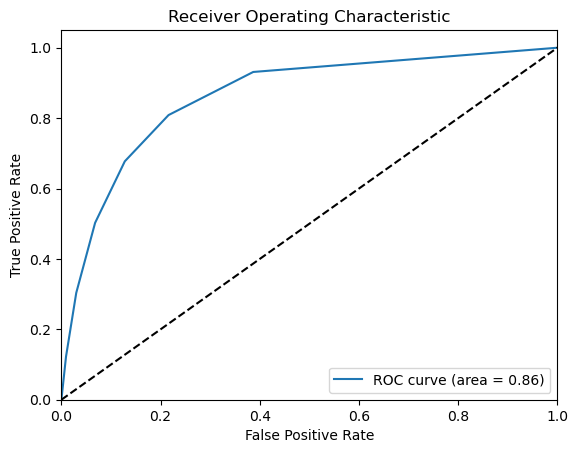

Confusion Matrix:
 [[2318  154]
 [ 446  338]]


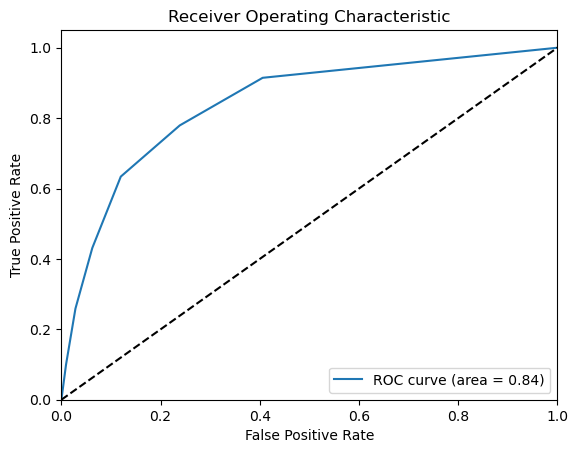

Confusion Matrix:
 [[2317  155]
 [ 399  385]]


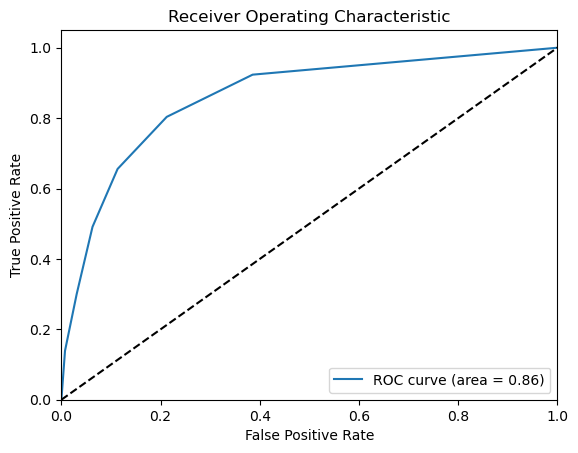

Confusion Matrix:
 [[2298  174]
 [ 412  372]]


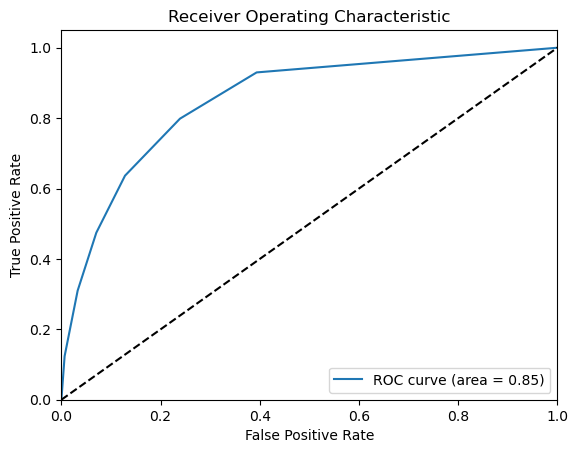

Confusion Matrix:
 [[2291  181]
 [ 388  396]]


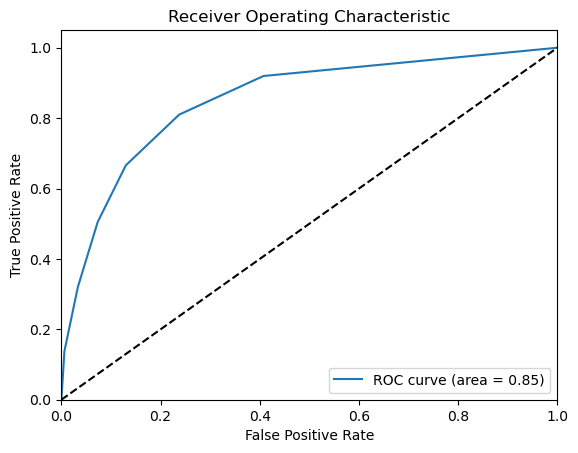

Mean Accuracy: 0.8191393287110204
Mean Specificity: 0.928438511326861
Mean Sensitivity: 0.4745530027297543
Mean F1 Score: 0.8072415901408011
Mean AUC: 0.8476958236026153


In [2]:
#KNN Classifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, f1_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


X = dataset
print(data.head())
Income = data['Income']

index = 0
for i, k in enumerate(data.keys()):
    if k == 'Income':
        index = i

X = np.delete(X, index, axis=1)

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
Y = Income.values

knn = KNeighborsClassifier(n_neighbors=6)

print(data['Income'].unique())
print(X_scale)
print(Y)

skf = StratifiedKFold(n_splits=10)
accuracy_scores = []
f1_scores = []
sensitivity_scores = []
specificity_scores = []
auc_scores = []

for train_index, test_index in skf.split(X_scale, Y):
    X_train, X_test = X_scale[train_index], X_scale[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    knn.fit(X_train, Y_train)
    predictions = knn.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(Y_test, predictions)
    accuracy_scores.append(accuracy)

    # Confusion Matrix
    cm = confusion_matrix(Y_test, predictions)
    print("Confusion Matrix:\n", cm)

    # Specificity and Sensitivity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)
    specificity_scores.append(specificity)
    sensitivity_scores.append(sensitivity)

    # F1 Score
    f1 = f1_score(Y_test, predictions, average='weighted')
    f1_scores.append(f1)

    # AUC and ROC Curve
    # First need to get the probability of each class
    proba = knn.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(Y_test, proba[:, 1], pos_label=1)
    auc = roc_auc_score(Y_test, proba[:, 1])
    auc_scores.append(auc)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

print(f'Mean Accuracy: {np.mean(accuracy_scores)}')
print(f'Mean Specificity: {np.mean(specificity_scores)}')
print(f'Mean Sensitivity: {np.mean(sensitivity_scores)}')
print(f'Mean F1 Score: {np.mean(f1_scores)}')
print(f'Mean AUC: {np.mean(auc_scores)}')


Epoch 1/2
1557/1557 [==============================] - 3s 1ms/step - loss: 0.3855 - accuracy: 0.8166 - val_loss: 0.3481 - val_accuracy: 0.8237
Epoch 2/2
1557/1557 [==============================] - 2s 1ms/step - loss: 0.3552 - accuracy: 0.8305 - val_loss: 0.3403 - val_accuracy: 0.8316
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,121
Trainable para

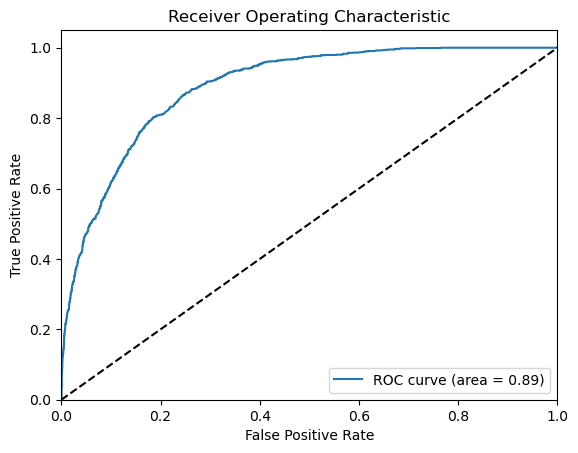

Epoch 1/2
1557/1557 [==============================] - 2s 1ms/step - loss: 0.3869 - accuracy: 0.8153 - val_loss: 0.3561 - val_accuracy: 0.8320
Epoch 2/2
1557/1557 [==============================] - 2s 1ms/step - loss: 0.3557 - accuracy: 0.8306 - val_loss: 0.3557 - val_accuracy: 0.8309
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                896       
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,121
Trainable pa

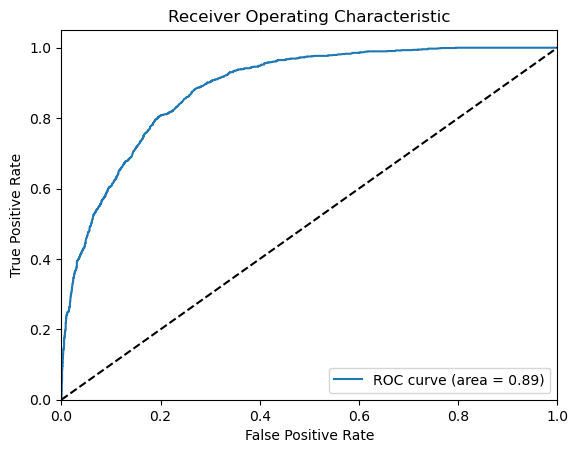

Epoch 1/2
1557/1557 [==============================] - 3s 1ms/step - loss: 0.3767 - accuracy: 0.8222 - val_loss: 0.3628 - val_accuracy: 0.8288
Epoch 2/2
1557/1557 [==============================] - 2s 1ms/step - loss: 0.3542 - accuracy: 0.8320 - val_loss: 0.3469 - val_accuracy: 0.8360
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                896       
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 5,121
Trainable pa

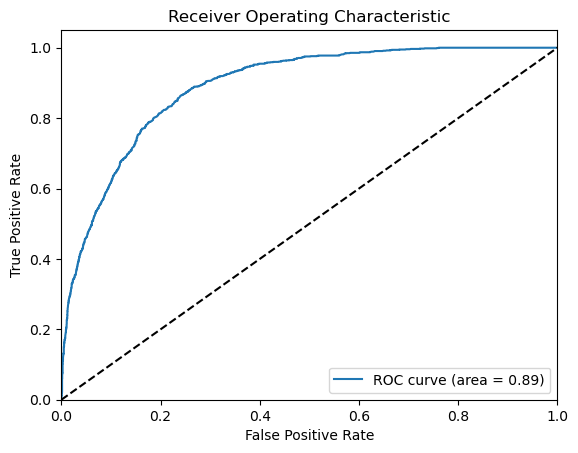

Epoch 1/2
1557/1557 [==============================] - 2s 1ms/step - loss: 0.3846 - accuracy: 0.8191 - val_loss: 0.3642 - val_accuracy: 0.8331
Epoch 2/2
1557/1557 [==============================] - 2s 1ms/step - loss: 0.3526 - accuracy: 0.8300 - val_loss: 0.3561 - val_accuracy: 0.8324
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                896       
                                                                 
 dense_13 (Dense)            (None, 64)                2112      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 5,121
Trainable pa

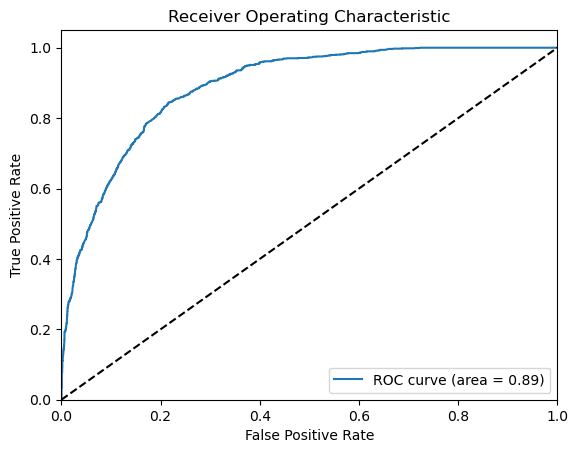

Epoch 1/2
1557/1557 [==============================] - 2s 1ms/step - loss: 0.3775 - accuracy: 0.8209 - val_loss: 0.3645 - val_accuracy: 0.8270
Epoch 2/2
1557/1557 [==============================] - 2s 1ms/step - loss: 0.3526 - accuracy: 0.8296 - val_loss: 0.3523 - val_accuracy: 0.8367
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 32)                896       
                                                                 
 dense_17 (Dense)            (None, 64)                2112      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 5,121
Trainable pa

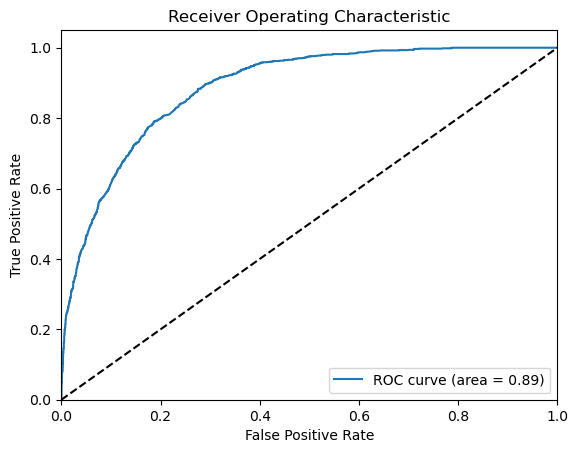

Epoch 1/2
1557/1557 [==============================] - 3s 1ms/step - loss: 0.3843 - accuracy: 0.8170 - val_loss: 0.3431 - val_accuracy: 0.8353
Epoch 2/2
1557/1557 [==============================] - 2s 1ms/step - loss: 0.3537 - accuracy: 0.8289 - val_loss: 0.3435 - val_accuracy: 0.8389
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 32)                896       
                                                                 
 dense_21 (Dense)            (None, 64)                2112      
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 5,121
Trainable pa

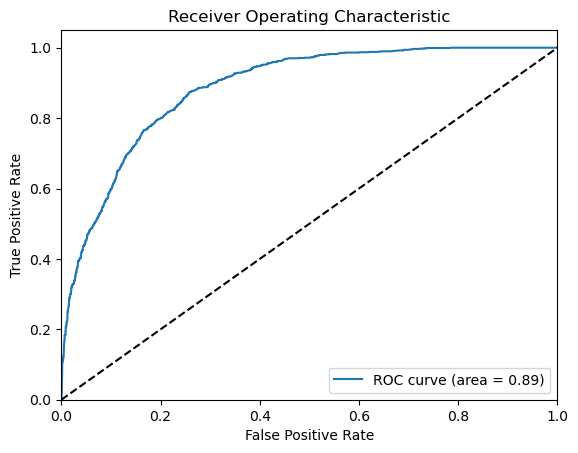

Epoch 1/2
1557/1557 [==============================] - 2s 1ms/step - loss: 0.3821 - accuracy: 0.8205 - val_loss: 0.3553 - val_accuracy: 0.8327
Epoch 2/2
1557/1557 [==============================] - 2s 1ms/step - loss: 0.3540 - accuracy: 0.8305 - val_loss: 0.3463 - val_accuracy: 0.8356
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 32)                896       
                                                                 
 dense_25 (Dense)            (None, 64)                2112      
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dense_27 (Dense)            (None, 1)                 33        
                                                                 
Total params: 5,121
Trainable pa

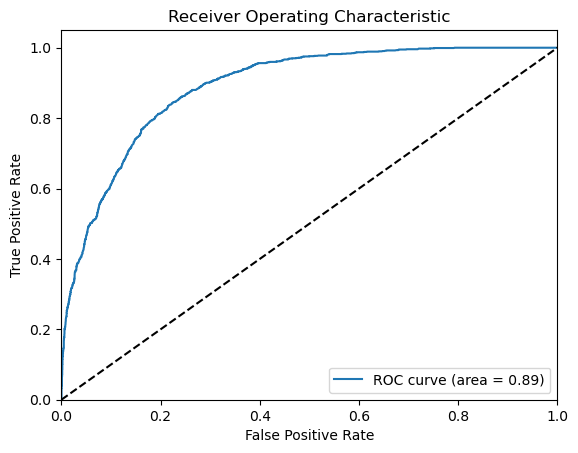

Epoch 1/2
1557/1557 [==============================] - 2s 1ms/step - loss: 0.3819 - accuracy: 0.8222 - val_loss: 0.3697 - val_accuracy: 0.8175
Epoch 2/2
1557/1557 [==============================] - 2s 1ms/step - loss: 0.3552 - accuracy: 0.8325 - val_loss: 0.3545 - val_accuracy: 0.8265
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 32)                896       
                                                                 
 dense_29 (Dense)            (None, 64)                2112      
                                                                 
 dense_30 (Dense)            (None, 32)                2080      
                                                                 
 dense_31 (Dense)            (None, 1)                 33        
                                                                 
Total params: 5,121
Trainable pa

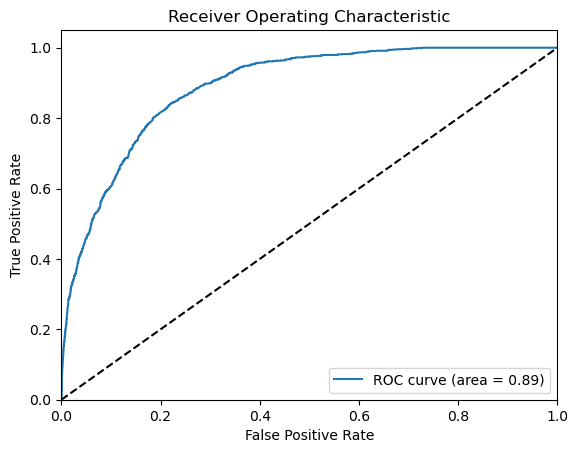

Epoch 1/2
1557/1557 [==============================] - 2s 1ms/step - loss: 0.3819 - accuracy: 0.8192 - val_loss: 0.3483 - val_accuracy: 0.8298
Epoch 2/2
1557/1557 [==============================] - 2s 1ms/step - loss: 0.3548 - accuracy: 0.8301 - val_loss: 0.3483 - val_accuracy: 0.8345
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 32)                896       
                                                                 
 dense_33 (Dense)            (None, 64)                2112      
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dense_35 (Dense)            (None, 1)                 33        
                                                                 
Total params: 5,121
Trainable pa

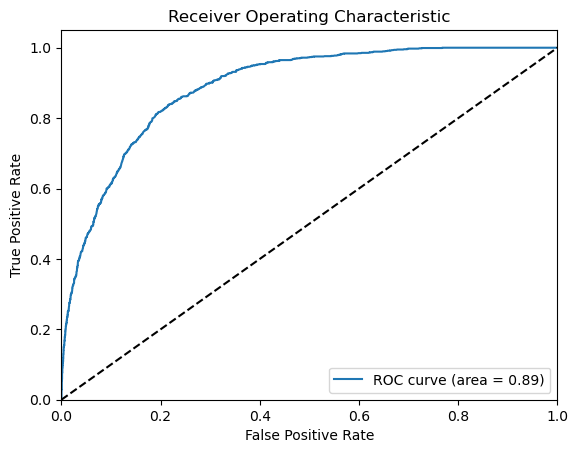

Epoch 1/2
1557/1557 [==============================] - 3s 1ms/step - loss: 0.3839 - accuracy: 0.8188 - val_loss: 0.3608 - val_accuracy: 0.8348
Epoch 2/2
1557/1557 [==============================] - 2s 1ms/step - loss: 0.3570 - accuracy: 0.8281 - val_loss: 0.3544 - val_accuracy: 0.8291
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 32)                896       
                                                                 
 dense_37 (Dense)            (None, 64)                2112      
                                                                 
 dense_38 (Dense)            (None, 32)                2080      
                                                                 
 dense_39 (Dense)            (None, 1)                 33        
                                                                 
Total params: 5,121
Trainable pa

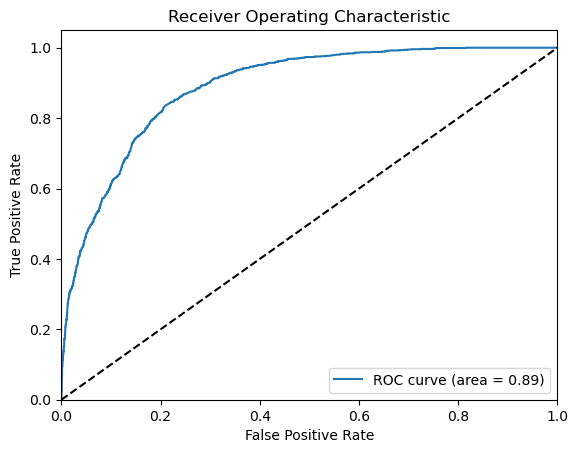

Mean Accuracy: 0.7611054247697033
Mean Specificity: 1.0
Mean Sensitivity: 0.0
Mean F1 Score: 0.657861204066897
Mean AUC: 0.8882349951808128


In [3]:
#NN Classifier
import keras
from keras.models import Sequential
from keras.layers import Dense
def train(X_train, Y_train, X_val, Y_val):
    hist = model.fit(X_train, Y_train,
                     batch_size=16, epochs=2,
                     validation_data=(X_val, Y_val))
    print(model.summary())
    print(hist)
    return model

def init():
    global model
    model = Sequential([
        Dense(32, activation='relu', input_shape=(27,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid'),
    ])
    model.compile(optimizer='Adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])



def main():
    dataset = data.values
    X = dataset
    Income = data['Income']

    index = 0
    for i, k in enumerate(data.keys()):
        if k == 'Income':
            index = i

    
    X = np.delete(X, index, axis=1)
    #print(data.keys())
    min_max_scaler = preprocessing.MinMaxScaler()
    X_scale = min_max_scaler.fit_transform(X)
    Y = Income.values

    
    
    X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
    X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
    
    X = np.concatenate((X_train, X_val), axis=0)
    Y = np.concatenate((Y_train, Y_val), axis=0)

    skf = StratifiedKFold(n_splits=10)
    accuracy_scores = []
    specificity_scores = []
    sensitivity_scores = []
    f1_scores = []
    auc_scores = []

    for train_index, val_index in skf.split(X, Y):
        X_train, X_val = X[train_index], X[val_index]
        Y_train, Y_val = Y[train_index], Y[val_index]

        init()
        model = train(X_train, Y_train, X_val, Y_val)
        predictions = model.predict(X_test)
        predictions_class = np.argmax(predictions, axis=1)

        # Accuracy
        accuracy = accuracy_score(Y_test, predictions_class)
        accuracy_scores.append(accuracy)

        # Confusion Matrix
        cm = confusion_matrix(Y_test, predictions_class)
        print("Confusion Matrix:\n", cm)

        # Specificity and Sensitivity
        tn, fp, fn, tp = cm.ravel()
        specificity = tn / (tn+fp)
        sensitivity = tp / (tp+fn)
        specificity_scores.append(specificity)
        sensitivity_scores.append(sensitivity)

        # F1 Score
        f1 = f1_score(Y_test, predictions_class, average='weighted')
        f1_scores.append(f1)

        # AUC and ROC Curve
        predictions_prob = predictions 
        fpr, tpr, thresholds = roc_curve(Y_test, predictions_prob[:, 0])
        auc = roc_auc_score(Y_test, predictions_prob[:, 0])
        auc_scores.append(auc)

        plt.figure()
        plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()

        model.save("./model.keras")

    print(f'Mean Accuracy: {np.mean(accuracy_scores)}')
    print(f'Mean Specificity: {np.mean(specificity_scores)}')
    print(f'Mean Sensitivity: {np.mean(sensitivity_scores)}')
    print(f'Mean F1 Score: {np.mean(f1_scores)}')
    print(f'Mean AUC: {np.mean(auc_scores)}')

if __name__ == '__main__':
    main()


In [4]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from keras.models import load_model
from keras.optimizers import Adam

def evaluate_with_cross_validation(model, X, Y):
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    scores = []
    for train_index, test_index in kfold.split(X, Y):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        
        model.fit(X_train, Y_train, epochs=30, batch_size=16, verbose=0)
        _, accuracy = model.evaluate(X_test, Y_test)
        scores.append(accuracy)
        
    return scores


#model = load_model("./model.keras")

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

scores = evaluate_with_cross_validation(model, X, Y)

for i, score in enumerate(scores):
    print(f"Fold {i+1}: Accuracy = {score}")

mean_score = np.mean(scores)
std_score = np.std(scores)
print(f"Mean Accuracy: {mean_score}")
print(f"Standard Deviation: {std_score}")


102/102 [==============================] - 0s 958us/step - loss: 0.3429 - accuracy: 0.8400
Fold 1: Accuracy = 0.8421860337257385
Fold 2: Accuracy = 0.8304668068885803
Fold 3: Accuracy = 0.8295454382896423
Fold 4: Accuracy = 0.8396806120872498
Fold 5: Accuracy = 0.8326166868209839
Fold 6: Accuracy = 0.8304668068885803
Fold 7: Accuracy = 0.8384521007537842
Fold 8: Accuracy = 0.8375307321548462
Fold 9: Accuracy = 0.8393734693527222
Fold 10: Accuracy = 0.8399876952171326
Mean Accuracy: 0.836030638217926
Standard Deviation: 0.004492027450946143


Task 4: Clustering

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense
model = keras.Model

def init():
    global model
    model = Sequential([
        Dense(32, activation='relu', input_shape=(27,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid'),
    ])
    model.compile(optimizer='Adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])


def train(X_train, Y_train, X_val, Y_val):
    hist = model.fit(X_train, Y_train,
                     batch_size=16, epochs=30,
                     validation_data=(X_val, Y_val))
    print(model.summary())
    print(hist)
    return model

def eval(X_test, Y_test):
    return model.evaluate(X_test, Y_test)[1]

In [6]:
from sklearn import svm, metrics

model = svm.SVC
def init():
    global  model
    model = svm.SVC(kernel='poly')  # Poly Kernel


def train(X_train, y_train):
    model.fit(X_train, y_train)
    return model

def eval(X_test, y_test):
    y_pred = model.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    return acc

init()
model = train(X_train, Y_train)
print(eval(X_test, Y_test))



0.8344594594594594


Task 4: Clustering

Index(['Age', 'Education-num', 'Sex', 'Has capital gain or loss', 'is married',
       'Work Hours', 'Employment type', ' ?', ' Adm-clerical', ' Armed-Forces',
       ' Craft-repair', ' Exec-managerial', ' Farming-fishing',
       ' Handlers-cleaners', ' Machine-op-inspct', ' Other-service',
       ' Priv-house-serv', ' Prof-specialty', ' Protective-serv', ' Sales',
       ' Tech-support', ' Transport-moving', ' Amer-Indian-Eskimo',
       ' Asian-Pac-Islander', ' Black', ' Other', ' White'],
      dtype='object')
[[ 3.71301889e-01  5.83218088e-01  1.00000000e+00  0.00000000e+00
   1.00000000e+00 -5.55111512e-16  5.60750741e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.30186351e-01  6.26126126e-01

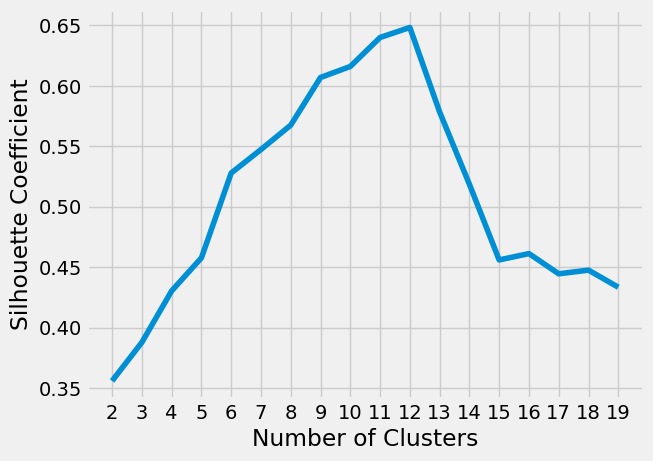

In [26]:
from sklearn.cluster import KMeans
import sklearn.cluster
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN

model = KMeans()
scaler = StandardScaler()
def init(clusters):
    global model
    model = KMeans(init="random", n_clusters=clusters, random_state=0, n_init="auto")

def train(X_train) -> sklearn.cluster._kmeans:
    #scaled_features = scaler.fit_transform(X_train)
    scaled_features = X_train
    model.fit(scaled_features)
    return model

def eval(X_train):
    max = 20
    silhouette_coefficients = []
    scaled_features = X_train
    #scaled_features = scaler.fit_transform(X_train)
    for k in range(2, max):
        model = KMeans(init="random", n_clusters=k, random_state=0, n_init="auto")
        model.fit(scaled_features)
        score = silhouette_score(scaled_features, model.labels_)
        silhouette_coefficients.append(score)
    plt.style.use("fivethirtyeight")
    plt.plot(range(2, max), silhouette_coefficients)
    plt.xticks(range(2, max))
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Coefficient")
    plt.show()
    
    
init(12) # 12 is best
model = train(X_train)
cols = data.columns
cols = cols.drop('Income')
print(cols)
print(model.cluster_centers_)





print("_______________")
eval(X_train)

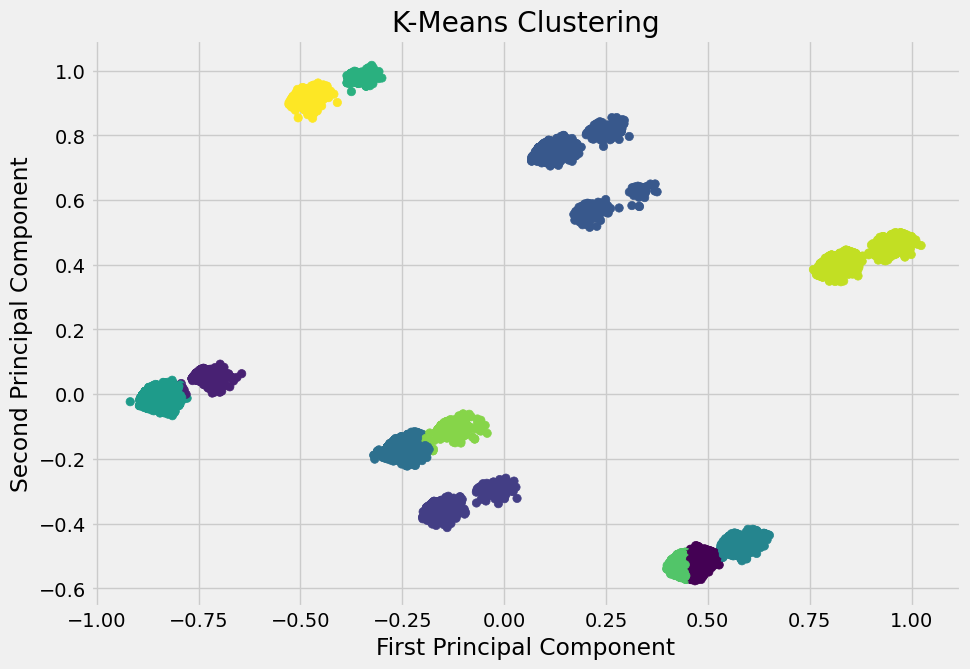

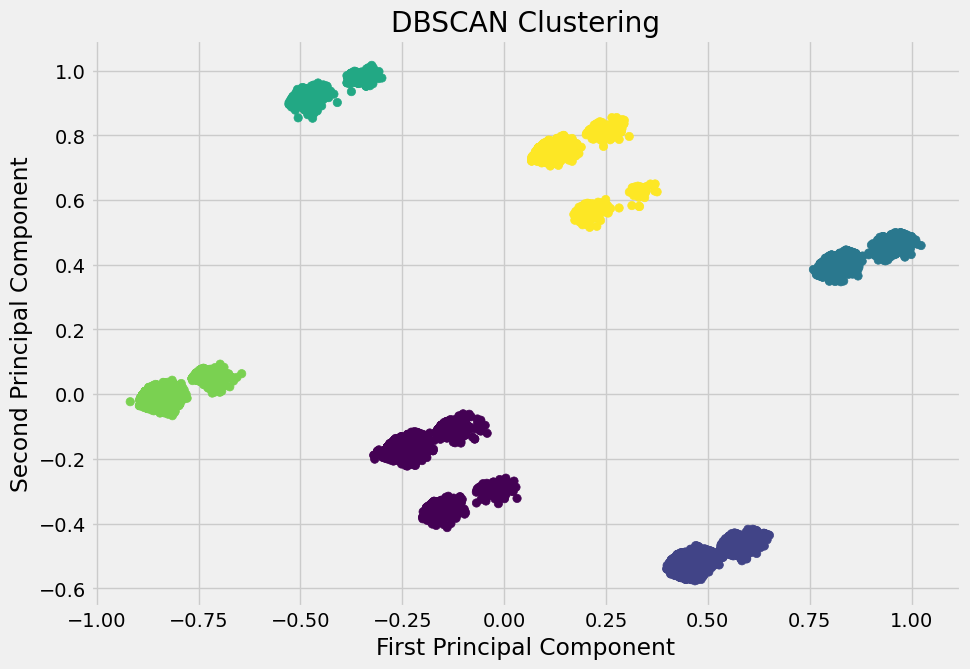

In [12]:
model = KMeans(init="random", n_clusters=12, random_state=0, n_init="auto")
pca = PCA(n_components=2)
df_pca = pca.fit_transform(X_train)


kmeans_clusters = model.fit_predict(df_pca)

plt.figure(figsize=(10, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_clusters, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

dbscan = DBSCAN(eps=0.2)
dbscan_clusters = dbscan.fit_predict(df_pca) 


#Visualize cluster methodes to see found clusters



plt.figure(figsize=(10, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=dbscan_clusters, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show() 